<h2>Ejercicio 1 - Árboles de Decisión. Sobreajuste y ruido </h2>
En este ejercicio se utilizan IDT para crear modelos de conocimiento sobre una determinado set de datos y se analiza su comportamiento. En particular se utilizaremos diferentes estrategias de poda (variando el tamaño máximo del árbol) para analizar el efecto de sobreajustar el modelo a los datos de entrenamiento. Adicionalmente, se analiza el comporamiento de los árboles al introducir ruido en los datos de entrenamiento.

<h3>Introducción</h3>
El método de aprendizaje utilizando árboles de decición es uno de los más utilizados debido a su simple utilización e interpretación. Los árboles de decición clasifican las instancias ordenandolas desde la raíz hasta una hoja. Como se muestra en la figura, cada nodo representa la evaluación de un atributo (que debe ser de valor discreto), cada rama representa un posible valor del atributo y las hojas predicen la clase para una determinada observación.

<img src="img/IDT.png" />

Uno de los errores mas comunes de cometer al utilizar árboles de decición es caer en sobreajuste. Se entiende por sobreajuste cuando el modelo creado (en este caso el árbol de decición) mide con demaciada exactitud los datos de entrenamiento, pero al ser utilizado con nuevas instancias se comporta con mayor error. Formalmente, se dice que una hipótesis h se sobreajusta a los datos de entrenamiento si exite una hipotesis h', tal que  h tiene menor error que h' sobre las instancias de entrenamiento, pero h' tiene menor error que h sobre todas las posibles instancias.

<h3>Datos utilizados para los experimentos</h3>

Para este ejercicio se utilizó el <a href="https://archive.ics.uci.edu/ml/datasets/Car+Evaluation"> Car Evaluation Data Set </a> obtenido del repositorio de <a href="https://archive.ics.uci.edu/ml/index.html">UCI</a>.
Este conjunto de datos contiene 1728 observaciones con 6 atributos y 4 categorías. Los valores de los atributos representan características de los automóviles para su evaluación (unnac, acc, good, v-good), tales como:
<pre>
   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
</pre>   
Tanto los valores de las clases como de los atributos fueron converidos a numérico en [1-4]. Las clases se encuentran desbalanceadas en cuanto a la cantidad de observaciones, tal como:
<pre>
   class      N          N[%]
   -----------------------------
   unacc     1210     (70.023 %) 
   acc        384     (22.222 %) 
   good        69     ( 3.993 %) 
   v-good      65     ( 3.762 %)
</pre>   

<h3>Set de datos, instancias de test y entrenamiento</h3>
El primer paso es cargar el set de datos. Esto se realiza leyendo el archivo cvs (preprocesado para que los atributos posean valores numericos [1-4]). Se utiliza numpy para separar los atributos de las clases (targets).

In [1]:
import numpy as np
data = []
with open("car.data.csv", "r") as fin:
    for line in fin:
        data.append(line.strip().split(","))
        
np_data = np.asarray(data).astype('int')
targets_data = np_data[:,6]
x_data = np_data[:,0:6]

A continuación se utiliza el módulo 'cross validation' para separar en dos conjuntos de 'entrenamiento' y 'prueba' en una proporción 80-20 respectivamente.

In [2]:
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(x_data, targets_data, test_size=0.2, random_state=0)

Como se puede comprobar a continuación, el conjunto de entrenamiento posee 1382 instancias y el conjunto de prueba 346.

In [3]:
print "Datos de entrenamiento:", X_train.shape, y_train.shape
print "Datos de prueba:", X_test.shape, y_test.shape

Datos de entrenamiento: (1382, 6) (1382,)
Datos de prueba: (346, 6) (346,)


<h3>Árbol de decición completo</h3>
Comenzamos creando un arbol de decición completo, sin ninguna restricción para su tamaño. Como se puede observar, al ajustarse a los datos de entrenamiento, el árbol generado posee 143 nodos.

In [4]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [5]:
print ("Cantidad de nodos del árbol generado: %f" % clf.tree_.node_count)

Cantidad de nodos del árbol generado: 149.000000


Dado que el árbol fue creado sin restriccion alguna, éste predice perfectamente los datos de entrenamiento:

In [6]:
print("Score para los datos de entrenamiento: %f" % clf.score(X_train, y_train))

Score para los datos de entrenamiento: 1.000000


Sin embargo, al utilizar los datos de prueba la prediccion deja de ser perfecta. Es sorprendente observar que el árbol de decición se comporta de manera muy performate y logró modelar con muy buena exactitud las clases del problema.

In [7]:
print("Score para los datos de prueba: %f" % clf.score(X_test, y_test))

Score para los datos de prueba: 0.973988


<h3>Árboles de decición con poda</h3>
A continuacion veremos como se comprotan árboles de decición donde se restringe la cantidad de nodos máxima al crear el árbol. Esto es esquivalente a no ajustar el árbol completamente a los datos de entrenamiento, y tomar en cuenta unicamente los atributos mas relevantes.<br>
Por ejemplo, si permitimos una cantidad máxima de 50 nodos en el árbol vemos que ya no se ajusta perfectamente a los datos de entrenamiento. Sin embargo, para los datos de prueba la predicción resulta peor que en el caso de utilizar un arbol sin restricción.

In [8]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=50)
clf=clf.fit(X_train, y_train)
print("Score para los datos de entrenamiento: %f" % clf.score(X_train, y_train))
print("Score para los datos de prueba: %f" % clf.score(X_test, y_test))

Score para los datos de entrenamiento: 0.989870
Score para los datos de prueba: 0.959538


Realizamos esta misma prueba iterando sobre diferentes valores para la cantidad de nodos máxima permitida.

In [9]:
%pylab inline
def plotPerformanceVsTreeSize(X_train, y_train, X_test,y_test, sizeRange=range(2,70,1)):
    xdata1 = []
    yserie1 = []
    yserie2 = []
    yserie3 = []
    clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
    score_complete = clf.score(X_test,y_test)
    for i in sizeRange:
        clf = tree.DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train, y_train)
    
        xdata1.append(i)
        yserie1.append(clf.score(X_train, y_train))
        yserie2.append(clf.score(X_test,y_test))
        yserie3.append(score_complete)
        
        
    plot(xdata1, yserie1, '.-g', label="Datos de Entrenamiento")
    plot(xdata1, yserie2, '.-b', label="Datos de Prueba")
    plot(xdata1, yserie3, '-r', label="Datos de prueba - Arbol completo")
    grid('on')
    xlabel('Cantidad de hojas')
    ylabel('Score')
    title('Score para arboles de decicion podados')
    legend(loc='right')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


El siguiente gráfico muestra el score para los datos de entrenamiento (en rojo) y para los datos de prueba (en azul) al variar la cantidad de nodos máxima del árbol de decición).
NOTA: Si se desea ver con mayor detalle una determina area, es posible cambiar parametro sizeRange y ejecutar la celda del notebook para regenerar el gráfico

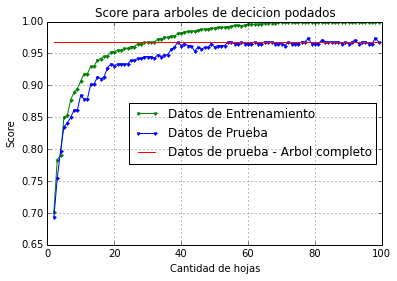

In [10]:
plotPerformanceVsTreeSize(X_train, y_train, X_test,y_test, sizeRange=range(2,100))

En el gráfico se puede observar que para los datos de entrenamiento la performance es estricamente creciente al utilizar árboles de mayor tamaño. Para árboles con más de 75 hojas, la performance para datos de entrenamiento es perfecta. Esto es esperable, ya que el árbol aprende por completo los datos de entrenamiento, teniendo una hoja para cada posible ocurrencia. De este hecho tambien podemos concluir que los datos de entrenamiento son "coherentes" entre sí, es decir que para los mismos valores de atributos corresponde siempre la misma clase, que no siempre es verdadero en todos los contextos (por ejemplo en pacientes de un hospital).
En cuanto a la performace para los datos de prueba podemos observar que en general siempre es menor que para los datos de entrenamiento (exceptuando al utilizar 4 hojas). Si bien la tendencia también es en general creciente, se puede observar en ocaciones que utilizando árboles de menor tamaño la performance es levemente mejor. Por ejemplo, la performance con 44 hojas es 0.955, menor que al utilizar 40 hojas donde la performance es 0.965.  

<h3>Entrenamiento con datos distorcionados</h3>
A continuacion se analiza el comportamiento de los árboles podados al utilizarse datos de entrenamiendo imperfectos. Para esto, se introduce diferentes niveles de ruido en las instancias de entrenamientos y se evalua la performance.

Creamos la funcion addNoise que introduce un determinado porcentaje de ruido en un set de datos

In [11]:
def addNoise(data, noise):
    noise_idx = random.random(data.shape)
    data_with_noise = data.copy()
    data_with_noise[noise_idx<noise] = random.random_integers(1,4, data_with_noise[noise_idx<noise].size)
    return data_with_noise    

El siguiente gráfico muestra el score para los datos de entrenamiento (en rojo) y para los datos de prueba (en azul) al variar la cantidad de nodos máxima del árbol de decición) utilizando 10% de ruido

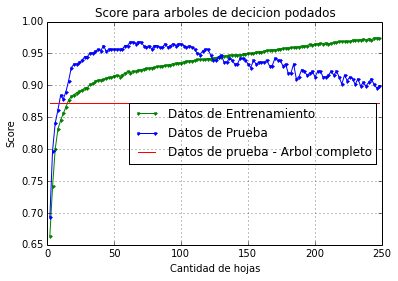

In [20]:
y_train_with_noise = addNoise(y_train, 0.1)
plotPerformanceVsTreeSize(X_train, y_train_with_noise, X_test,y_test, sizeRange=range(2,250, 2))

Como se puede observar, al agregar ruido a los datos de entrenamiento la performance en los datos de prueba es mejor para árboles de menor tamaño. Al utilizar una cantidad de hojas mayor a 45 la performance comienza a decrecer y para el árbol de decición completo el score es ~0.87. Esto se debe al sobre ajuste a los datos de entrenamiento, que en este caso son irregulares o "incoherentes" entre sí (debido al ruido introducido). Por lo tanto, al crear árboles de mayor tamaño se ajusta el modelo fuertemente a los datos de entrenamiento, que luego al ser puesto a prueba resulta menos performante.

<h3>Introduciendo diferentes niveles de distorción</h3>
A continuacion se muestra la misma gráfica que en el experimento anterior, pero utilizando mayor porcentaje de distorción. Los siguientes graficos corresponden a 20, 30 y 50 porciento de distorción respectivamente:

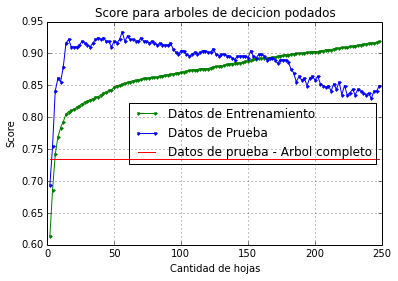

In [13]:
y_train_with_noise = addNoise(y_train, 0.20)
plotPerformanceVsTreeSize(X_train, y_train_with_noise, X_test,y_test, sizeRange=range(2,250, 2))

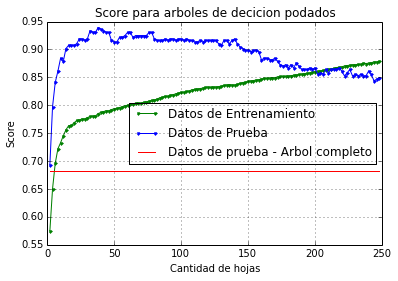

In [14]:
y_train_with_noise = addNoise(y_train, 0.3)
plotPerformanceVsTreeSize(X_train, y_train_with_noise, X_test,y_test, sizeRange=range(2,250, 2))

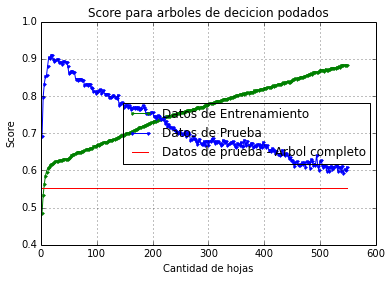

In [15]:
y_train_with_noise = addNoise(y_train, 0.5)
plotPerformanceVsTreeSize(X_train, y_train_with_noise, X_test,y_test, sizeRange=range(2,550, 2))

Se puede observar en las gráficas anteriores que al utilizar mayor distorción, la performance de los árboles mas pequeños es mejor (cuanto mayor distorcion, la cantidad de hojas óptima es menor), debido al sobre ajuste explicado anteriormente. También se observa como la performance para los datos de entrenamiento se reduce notablemente con la introducción de mayor ruido. <br>
Por ejemplo, en el ultimo gráfico donde se utilizan datos de entrenamiento con 50% de ruido se observa facilmente el efecto del sobre ajuste. En general sería intuitivo querer utilizar árboles de gran tamaño, ya que modelan con gran exactitud las observaciones y con que se comportan muy bien al probarlos con los datos de entrenamiento. Sin embargo, en este experimento podemos ver que árboles grandes (en el gráfico se puede tomar el ejemplo del arbol con 500 hojas) se comportan bien para los datos de entrenamiento, pero muy mal para los datos de prueba.

<h3>Conclusión</h3>
En este ejercicio hemos trabajado con árboles de decición para modelar la clasificacion de autos según algunas de sus características. Al utilizar los datos crudos, observamos que un árbol de decición completo (sin poda) modela con gran exactitud las observaciónes. <br>
Al introducir ruido en los datos de entrenamiento, se observa que los árboles sin poda se comportan mucho peor que al utilizar árboles podados debido al efecto del sobre ajuste. Cuanto mayor es el ruido introducido, mayor es el efecto del sobre ajuste. <br>
Sin embargo, utilizando árboles con cantidad de hojas óptima la performance es muy buena (un score siempre mayor a score 0.9), incluso para datos de entrenamiento con una gran procentaje de ruido (>50%).

<h3> COSAS QUE NO TENIENDO </h3>
- como poner la leyenda afuera del grafico
- porque la performance de los datos de entrenamiento es siempre estricamente incremental y si se usan arboles grandes la performance llega al 100%. Yo esperaria que si los datos de entrenamiento tienen ruido (no son coherentes), no haya ningun arbol de decicion para el que la performance de 100%

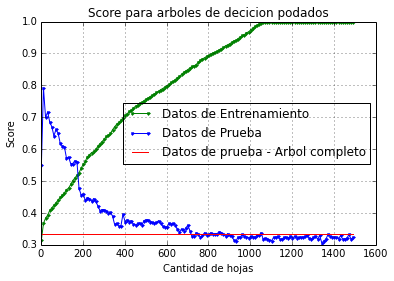

In [16]:
y_train_with_noise = addNoise(y_train, 0.8)
plotPerformanceVsTreeSize(X_train, y_train_with_noise, X_test,y_test, sizeRange=range(2,1500, 10))
# por mas que hay mucho ruido, con muuuchos nodos la performance llega a 100% para los de entrenamiento

Pero si agreguo ruido tambien en la clase, ahi si que no llega a 100%

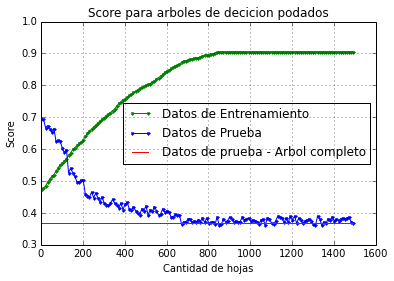

In [31]:
y_train_with_noise = addNoise(y_train, 0.5)
X_train_with_noise = addNoise(X_train, 0.9)
plotPerformanceVsTreeSize(X_train_with_noise, y_train_with_noise, X_test,y_test, sizeRange=range(2,1500, 10))
# por mas que hay mucho ruido, con muuuchos nodos la performance llega a 100% para los de entrenamiento